### Build a DNN using Keras with `RELU` and `ADAM`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

import tensorflow.keras

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [18]:
print(trainX.shape)

(60000, 28, 28)


In [19]:
print(trainY.shape)

(60000,)


#### Change train and test labels into one-hot vectors

In [0]:
trainY=tf.keras.utils.to_categorical(trainY)
testY=tf.keras.utils.to_categorical(testY)

In [21]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Build the Graph

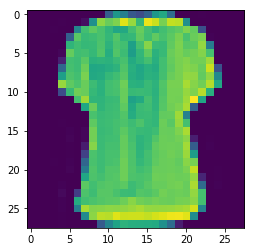

In [22]:
import matplotlib.pyplot as plt

image = trainX[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

#### Initialize model, reshape & normalize data

In [0]:
# define some hyper parameters 
batch_size = 100 
n_inputs = 784 
n_classes = 10 
n_epochs = 20 

# get the data 
import numpy as np

In [24]:
x_train = trainX.reshape( 60000, n_inputs) 
print(x_train)
x_test = testX.reshape( 10000, n_inputs) 

# convert the input values to float32 
x_train = x_train.astype( np.float32) 
x_test = x_test.astype( np.float32) 

# normalize the values of image vectors to fit under 1 
x_train /= 255 
x_test /= 255 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
y_train = trainY 
y_test = testY

In [0]:

from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import utils 

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model = tf.keras.Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 200, activation ='relu', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dense( units = 100, activation ='relu')) 
model.add( Dropout( 0.25)) # output layer can only have the neurons equal to the number of outputs 


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [28]:
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = Adam(), metrics =['accuracy']) 

# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5578 - acc: 0.8020
Epoch 2/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3912 - acc: 0.8590
Epoch 3/20
60000/60000 [==================

###  The  accuracy of the model is 89.24% using Adam optimizer and 200 and 100 neuron in the hidden layers and activation as relu